# Time Series Analysis


**What is time series analysis?**

Time series analysis involves studying and modeling data points that are indexed and ordered chronologically. This could be hourly, daily, monthly, or even yearly data. By analyzing time series data, we can uncover hidden patterns, detect seasonality, understand the impact of past events, and make predictions for future values.



**How to perform  the time series analysis?**

Performing time series analysis involves several key steps. We will start by pre-processing the data, which includes handling missing values, removing outliers, and ensuring the data is in a suitable format for analysis. Next, we will perform exploratory data analysis (EDA) to gain insights into the data, such as  correlation exploration and trend analysis. Then, we will utilize various techniques and models, such as moving averages, exponential smoothing, and autoregressive integrated moving average (ARIMA) models, to help us capture the patterns and relationships within the data and make predictions or forecasts for future time points.

**What are we exploring today?**

In this time series analysis, we will explore a bike sales dataset to gain insights and make predictions based on the historical sales data. We aim to uncover the underlying patterns in the sales data and make future predictions.

Through this analysis, we aimed to answer questions such as:

- What are the overall sales trends?

- Is there any seasonality in the sales data?

- Can we forecast future sales based on historical patterns?

By utilizing Python and libraries such as pandas, NumPy, and statsmodels, we performed a comprehensive analysis of the dataset and obtained valuable insights that can be used for decision-making and planning.

# ![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## 1. Data Preparation

 Load the dataset and prepare the data for time series analysis.

In [ ]:
import pandas as pd

# Read the CSV file and parse the 'Date' column as datetime
df = pd.read_csv('sales_data.csv', parse_dates=['Date'])

# Set 'Date' column as the index
df.set_index('Date', inplace=True)


In [ ]:
df.head()

,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
Date,,,,,,,,,,,,,,,,,
2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 113036 entries, 2013-11-26 to 2016-03-04
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Day               113036 non-null  int64 
 1   Month             113036 non-null  object
 2   Year              113036 non-null  int64 
 3   Customer_Age      113036 non-null  int64 
 4   Age_Group         113036 non-null  object
 5   Customer_Gender   113036 non-null  object
 6   Country           113036 non-null  object
 7   State             113036 non-null  object
 8   Product_Category  113036 non-null  object
 9   Sub_Category      113036 non-null  object
 10  Product           113036 non-null  object
 11  Order_Quantity    113036 non-null  int64 
 12  Unit_Cost         113036 non-null  int64 
 13  Unit_Price        113036 non-null  int64 
 14  Profit            113036 non-null  int64 
 15  Cost              113036 non-null  int64 
 16  Revenue           1130

In [ ]:
# Resample the data to monthly frequency
df = df.resample('MS').sum()

<ipython-input-5-5d8f7b2f23c7>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df.resample('MS').sum()


In [ ]:
df.shape

(67, 9)

In [ ]:
# Drop irrelevant columns
df = df['Revenue']


In [ ]:
df.head()

Date
2011-01-01    675193
2011-02-01    637598
2011-03-01    708517
2011-04-01    698782
2011-05-01    734537
Freq: MS, Name: Revenue, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 67 entries, 2011-01-01 to 2016-07-01
Freq: MS
Series name: Revenue
Non-Null Count  Dtype
--------------  -----
67 non-null     int64
dtypes: int64(1)
memory usage: 1.0 KB


# ![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## 2. Exploratory Analysis and Visualization

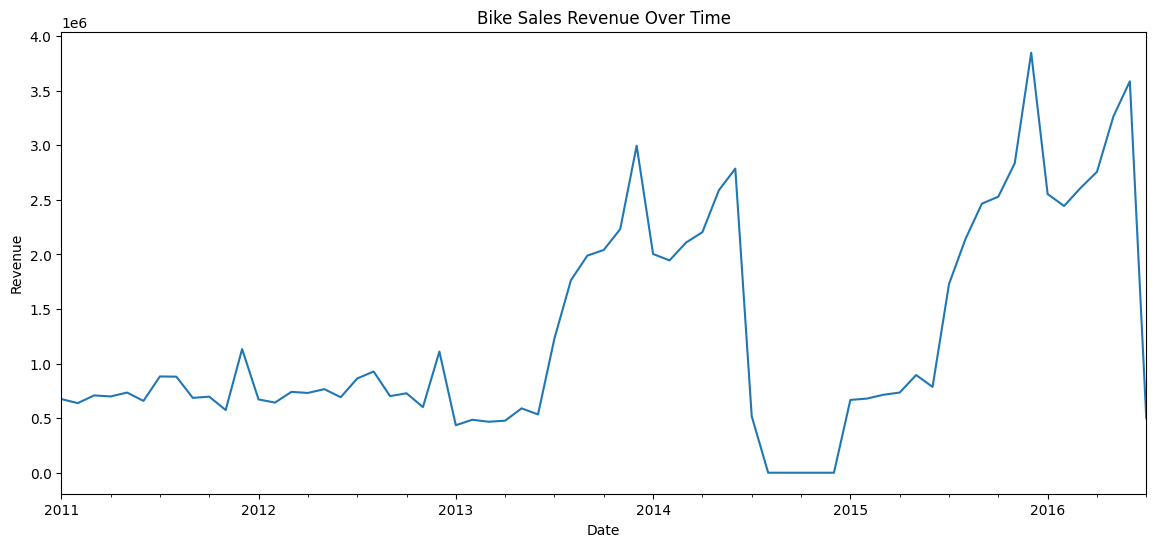

In [ ]:
import matplotlib.pyplot as plt

# Plot the sales trends over time
df.plot(figsize=(14, 6))
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.title('Bike Sales Revenue Over Time')
plt.show()

In [ ]:
df.describe()

count    6.700000e+01
mean     1.272702e+06
std      9.741355e+05
min      0.000000e+00
25%      6.503975e+05
50%      7.408240e+05
75%      2.074670e+06
max      3.848211e+06
Name: Revenue, dtype: float64

By visualizing the sales trends, we can observe the overall patterns, identify any significant increases or decreases, and understand the general behavior of bike sales over the analyzed period.

# ![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

##3. Time Series Decomposition

We break down the sales data into three components: trend (the long-term pattern or direction of sales), seasonality (the repeating pattern within each year), and residuals (the random fluctuations or noise in the data).

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition
decomposition = seasonal_decompose(df, model='additive')

# Extract the components
trend = decomposition.trend
seasonality = decomposition.seasonal
residuals = decomposition.resid

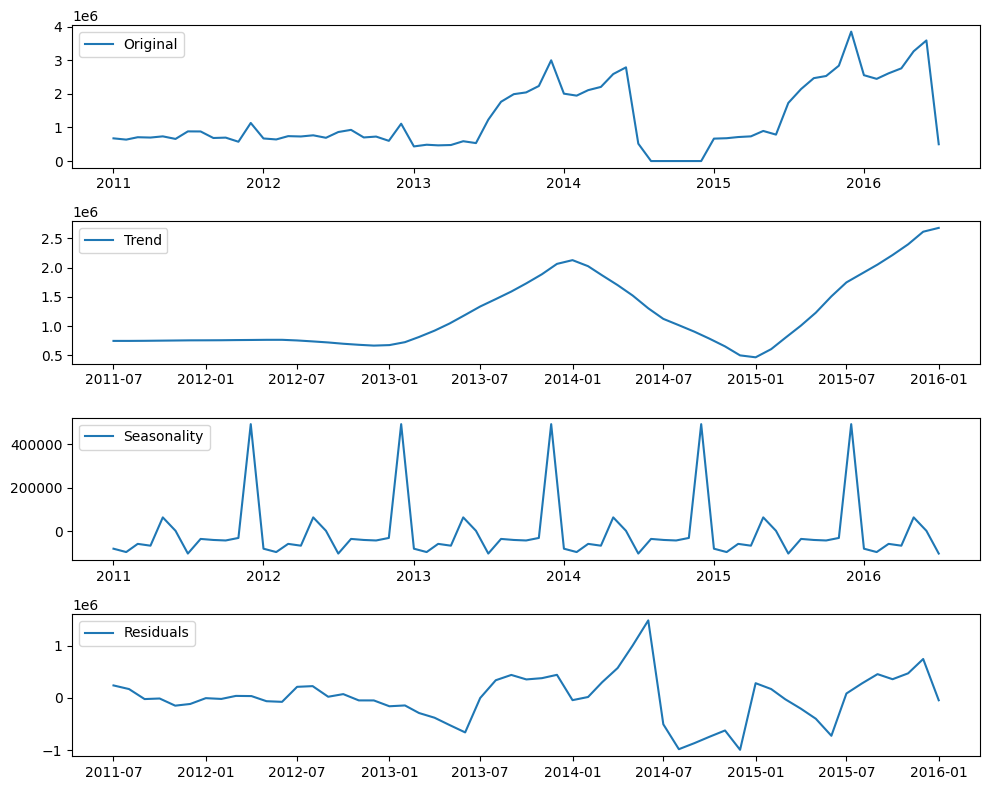

In [ ]:
import matplotlib.pyplot as plt

# Plot the components
plt.figure(figsize=(10, 8))
plt.subplot(4, 1, 1)
plt.plot(df, label='Original')
plt.legend(loc='best')
plt.subplot(4, 1, 2)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(4, 1, 3)
plt.plot(seasonality, label='Seasonality')
plt.legend(loc='best')
plt.subplot(4, 1, 4)
plt.plot(residuals, label='Residuals')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


By decomposing the time series, we can identify the underlying trend, seasonal patterns (e.g., higher sales during certain months), and any irregularities or unexpected behavior in the data.


#### A Note about the 4 figures


1. Original Data:
 - The first figure shows the original data, which represents the actual revenue values over time. This is the raw time series data that we are analyzing.
2. Trend Component:
 - The second figure displays the trend component, which represents the long-term pattern or the overall direction of the data. It captures the underlying growth or decline in the revenue values, ignoring the seasonal and irregular fluctuations.
 - The trend component is obtained by applying a smoothing technique to the data, such as moving averages or polynomial regression. This helps to identify the general trend in the time series.
3. Seasonality Component:
 - The third figure illustrates the seasonality component, which represents the repeating patterns or cycles that occur within a specific period, such as yearly, quarterly, or monthly patterns.
 - The seasonality component captures the systematic, predictable variations in the data that occur due to external factors like seasons, holidays, or other recurring events. It helps to understand the periodic fluctuations in the revenue values.
 - To obtain the seasonality component, we decompose the time series using mathematical techniques like Fourier analysis or moving averages, which identify and isolate the seasonal patterns.
4. Residuals Component:
 - The fourth figure shows the residuals component, also known as the remainder or the irregular component. It represents the unexplained variation or noise in the data that remains after removing the trend and seasonality components.
 - The residuals capture the random fluctuations, unexpected events, or noise in the time series data. They can be thought of as the "unpredictable" part of the data.
 - The residuals are obtained by subtracting the trend and seasonality components from the original data. It represents the part of the data that cannot be explained by the trend and seasonality.

# ![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## 4. Time Series Forecasting

### 4.1 Time Series Forecasting with ARIMA

We use the ARIMA (Autoregressive Integrated Moving Average) model, a popular technique for time series forecasting. The model uses past sales data and the observed patterns to predict future sales.

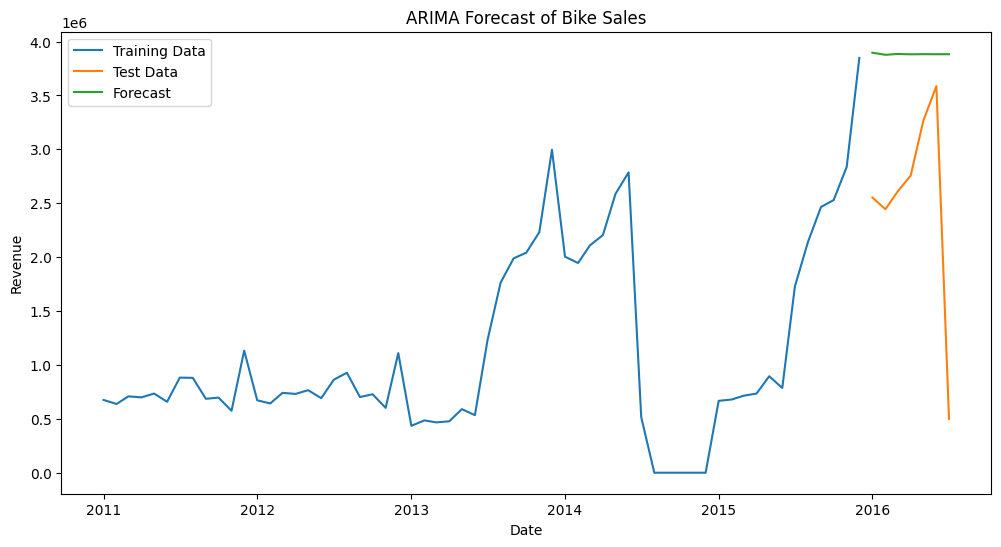

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Split the data into train and test sets
train_data = df.loc['2011-01-01':'2015-12-01']
test_data = df.loc['2016-01-01':]

# Fit the ARIMA model
model = ARIMA(train_data, order=(1, 1, 1))
model_fit = model.fit()

# Forecast future sales
forecast = model_fit.forecast(steps=len(test_data))

# Plot the actual and forecasted sales
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data, label='Training Data')
plt.plot(test_data.index, test_data, label='Test Data')
plt.plot(test_data.index, forecast, label='Forecast')
plt.title('ARIMA Forecast of Bike Sales')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.legend(loc='best')
plt.show()

#### A Note about the values of **order**

The three elements (p,d,q) in the ***order*** of an ARIMA model represent the autoregressive (AR) order, differencing (I) order, and moving average (MA) order, respectively.

Here are some common values for each component:

1. Autoregressive (AR) Order:
 - 0: No autoregressive terms are included, indicating that the current value of the time series does not depend on its past values.
 - 1: Only the lagged value of the time series is included, indicating a simple linear relationship between the current value and the previous value.
 - 2 or higher: Multiple lagged values of the time series are included, indicating a more complex relationship that depends on several past observations.
2. Differencing (I) Order:
 - 0: No differencing is performed, indicating that the time series is already stationary or the model does not require differencing.
 - 1: First-order differencing is performed by computing the difference between consecutive observations, aiming to remove trends and make the time series stationary.
 - 2 or higher: Higher-order differencing is performed when the time series still exhibits trends or seasonality after the first differencing.
3. Moving Average (MA) Order:
 - 0: No moving average terms are included, indicating that the current value of the time series does not depend on the past forecast errors.
 - 1: Only the first-order moving average term is included, considering the dependency on the most recent past forecast error.
 - 2 or higher: Multiple moving average terms are included, capturing the dependency on several past forecast errors.

The specific values for the order of an ARIMA model depend on the characteristics of the time series being analyzed and the patterns observed in the data. They can be determined using various techniques, such as visual inspection of autocorrelation and partial autocorrelation plots, model selection criteria (e.g., AIC, BIC), or domain knowledge about the data.

It's important to note that selecting the optimal order for an ARIMA model is often an iterative process that involves testing different combinations, evaluating the model's performance, and refining the order based on the analysis results.

###  Seasonal adjustment

In some cases, the seasonality in the data may be very pronounced and require explicit adjustment and modeling. In such situations, it is beneficial to remove the seasonal component from the original data and then apply modeling to capture any remaining trends and residuals.

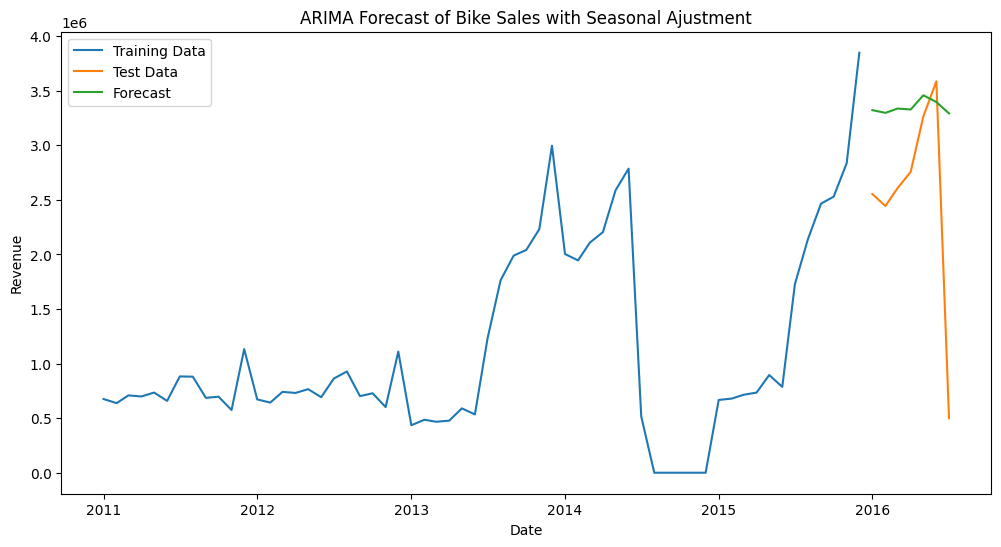

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

seasonally_adjusted = df - seasonality

# Split the data into train and test sets
train_data = seasonally_adjusted.loc['2011-01-01':'2015-12-01']
test_data = seasonally_adjusted.loc['2016-01-01':]

train_seasonality = seasonality.loc['2011-01-01':'2015-12-01']
test_seasonality = seasonality.loc['2016-01-01':]

# Fit the ARIMA model
model = ARIMA(train_data, order=(1, 1, 1))
model_fit = model.fit()

# Forecast future sales
forecast = model_fit.forecast(steps=len(test_data))

# Plot the actual and forecasted sales
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data + train_seasonality, label='Training Data')
plt.plot(test_data.index, test_data + test_seasonality, label='Test Data')
plt.plot(test_data.index, forecast + test_seasonality, label='Forecast')
plt.title('ARIMA Forecast of Bike Sales with Seasonal Ajustment')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.legend(loc='best')
plt.show()

## 4.2 Time Series Forecasting with SARIMAX

The goal of using a SARIMAX model is to capture the patterns and dynamics present in the time series data, including both non-seasonal and seasonal components, in order to make accurate predictions for future observations.

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


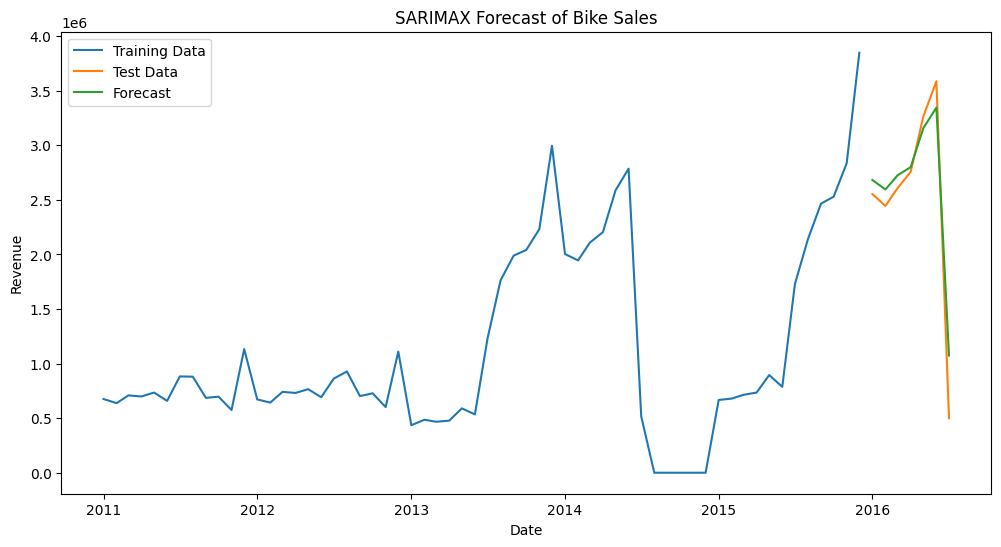

In [ ]:

# Split the data into train and test sets
train_data = df.loc['2011-01-01':'2015-12-01']
test_data = df.loc['2016-01-01':]

# Fit the SARIMAX model
model = SARIMAX(train_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit()

# Forecast future sales
forecast = model_fit.get_forecast(len(test_data))
forecast_values = forecast.predicted_mean

# Plot the actual and forecasted sales
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data, label='Training Data')
plt.plot(test_data.index, test_data, label='Test Data')
plt.plot(test_data.index, forecast_values, label='Forecast')
plt.title('SARIMAX Forecast of Bike Sales')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.legend(loc='best')
plt.show()

#### A Note about values of seasonal_order

The SARIMAX model is an extension of the ARIMA model that incorporates the additional component of seasonality. While the autoregressive (AR), differencing (I), and moving average (MA) orders remain the same as in ARIMA, SARIMAX introduces two additional sets of parameters for modeling seasonality, seasonal autoregressive (SAR), and seasonal moving average (SMA).

easonal_order=(P,D,Q,s) : This argument specifies the order of the seasonal components of the model. The first three values (P, D, Q) represent the seasonal autoregressive (SAR), seasonal differencing (SI), and seasonal moving average (SMA) orders, respectively. The last value (s) represents the number of time periods in a season. Often it is 4 for quarterly data or 12 for monthly data.

# ![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## 5. Evaluating Models

Evaluate the performance of the models using metrics like mean absolute error (MAE), mean squared error (MSE) or root mean squared error (RMSE).

In [ ]:
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# Calculate the mean absolute error (MAE) between the actual and forecasted sales
mae = mean_absolute_error(test_data, forecast_values)
print("Mean Absolute Error (MAE):", mae)

# Calculate the MSE
mse = mean_squared_error(test_data, forecast_values)
print("Mean Squred Error (MSE):", mse)

# Calculate the RMSE
rmse = np.sqrt(mse)

print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 194477.4804862574
Mean Squred Error (MSE): 64807477529.010994
Root Mean Squared Error (RMSE): 254573.1280575603


# ![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Exercise Activities

Exercise 1:
Forecast sales for the future 12 months.

Exercise 2:
Evaluating MAE, MSE and RMSE of the ARIMA model's predictions.

In [ ]:
## Your code




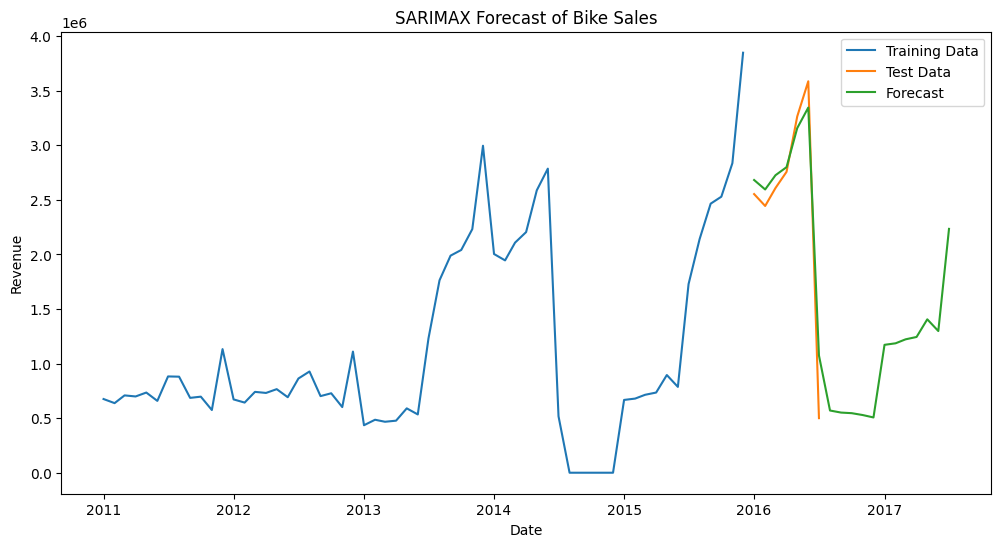

In [ ]:
# Forecast future sales
forecast = model_fit.get_forecast(19)
forecast_values = forecast.predicted_mean

# Plot the actual and forecasted sales
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data, label='Training Data')
plt.plot(test_data.index, test_data, label='Test Data')
plt.plot(forecast_values.index, forecast_values, label='Forecast')
plt.title('SARIMAX Forecast of Bike Sales')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.legend(loc='best')
plt.show()

# ![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## What's Next?



You have gained some insights into analyzing time series data, exploring patterns, and making predictions based on historical trends. As you conclude this practice, here are some key takeaways and suggestions for further exploration:

- Further Exploration: This practice provides you with a foundation in time series analysis. To enhance your skills, consider exploring more topics such as SARIMA models, state space models, or machine learning approaches like LSTM networks for time series forecasting.


- Incorporate External Factors: Real-world time series data is often influenced by external factors. Consider incorporating variables such as holidays, weather conditions, or economic indicators into your analysis to capture additional insights and improve prediction accuracy.

- Experiment with Models and Techniques: Try different approaches, such as alternative decomposition methods or forecasting algorithms, to gain a deeper understanding of their strengths and limitations.

- Continuously Refine and Evaluate: Time series analysis is an iterative process. Regularly re-evaluate your models, update forecasts, and assess accuracy based on new data. Adapt your models as needed to make informed decisions.

Mastering time series analysis requires practice and continuous learning. By exploring new datasets, experimenting with different techniques, and staying updated with advancements in the field, you will further enhance your skills!